# Tarea 3: Redes Trascripcionales

## INTRODUCCIÓN

Una red de regulación génica o red de regulación genética (GRN) es una colección de segmentos de ADN en una célula que interactúan entre sí (indirectamente a través de su ARN y productos de expresión de proteínas) y con otras sustancias en la célula, con lo que regulan las tasas a las que los genes de la red se transcriben en ARNm.

Unos tipos de proteínas son los **factores de transcripción** que unen secuencias específicas de ADN, controlando así la transcripción de la información genética de ADN a ARN mensajero. Los factores de transcripción hacen esto solos o en conjunto a otros complejos proteicos promoviendo (como un activador) o silenciando (como un represor) el reclutamiento de la RNA polimerasa a genes específicos.

Las redes de co-expresión génicas son un tipo de redes que persiguen integrar información parcial obtenida en diferentes experimentos o análisis de expresión génica. Típicamente se basan en datos transcriptómicos masivos obtenidos utilizando por ejemplo microarrays o RNA-seq.

En una red de co-expresión génica los nodos representan genes y las aristas entre nodos representan que los correspondientes genes se co-expresan en las distintas condiciones de los experimentos analizados. La co-expresión entre genes suele medirse utilizan la correlación entre sus perfiles de expresión en las condiciones estudiadas.

Analizando estos factores de transcripción se construyen las **redes transcripcionales**, son redes dirigidas donde los nodos representan genes y se traza una arista de un nodo g1 al nodo g2 cuando g1 codifica por un factor de transcripción que se une al promoter del g2. Típicamente, **estas redes se construyen a partir de datos de ChIP-seq y suponen un refinameinto de la redes de co-expresión génica.**

## OBJETIVOS

Esta tarea consiste en la elaboración de un red transcripcional con los genes diana de 10 factores de transcripción aleatorios. Estos genes diana son obtenidos por análisis de ChIP-Seq, los resultados de los análisis son descargados de [ncbi GEO](https://www.ncbi.nlm.nih.gov/geo/) y analizados posteriormente con el programa preparado para la primera tarea del curso **"Pipe-ChIP"**. Una vez obtenido los target genes se construirá la red transcripcional mediante un análisis en [RStudio](https://rstudio.com/) como se especificará más adelante.

## FACTORES DE TRASNCRIPCIÓN:

Los factores de trancripción analizados son:

   1 [AT5G60910](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE79554)
   2 [AT3G09370](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE60554)
   3 [AT5G61850](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE96806)
   4 [AT5G61380](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE35952)
   5 [AT3G15030](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE115358)
   6 [AT2G43060](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE51120)
   7 [AT2G43010](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE35315)
   8 [AT3G59060](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE35059)
   9 [AT1G21970](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE99587)
  10 [AT1G68480](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE51537)

El análisis se llevó a cabo en *Arabidopsis thaliana* por lo que si se desea buscar información sobre la función de alguno de estos factores de transcripción puede consultarse en [tair10](https://www.arabidopsis.org/index.jsp).

Los target genes obtenidos fueron los siguientes: 

  1 [AT5G60910](./AT5G60910.txt)
   2 [AT3G09370](./AT3G09370.txt)
   3 [AT5G61850](./AT5G61850.txt)
   4 [AT5G61380](./AT5G61380.txt)
   5 [AT3G15030](./AT3G15030.txt)
   6 [AT2G43060](./AT2G43060.txt)
   7 [AT2G43010](./AT2G43010.txt)
   8 [AT3G59060](./AT3G59060.txt)
   9 [AT1G21970](./AT1G21970.txt)
  10 [AT1G68480](./AT1G68480.txt)


## ANÁLISIS RSTUDIO:

Antes de comenzar con el análisis, explicar que al comparar las redes transcripcionales con redes de idénticas propiedades (nodos y arístas) exiten motivos que son significativamente más abundantes en estas redes biológicas. Estos motivos de red han sido seleccionado por presentar algún tipo de ventaja evolutiva y son de especial interés ya que nos permite enteder los mecanismos de regulación génica.

Script de Rstudio implementado: [RScript.r](./redes_transcripcionales.R)

### PAQUETE "IGRAPH"

Este paquete esta disponible en la página web de [Bioconductor](http://bioconductor.org/) y nos permitirá implementar las funciones que generen la red a partir de los datos obtenidos, así como, estudiar las características de esta red.

### GENERACIÓN DE LA RED

Este script recibe como entrada un fichero "targets.txt" donde a su vez se guardan los identificadores de los genes **(factores de transcripción)** para los cuales a partir de datos de ChIP-seq se han determinado sus dianas potenciales.

Archivo: [target.txt](./targets.txt)


In [ ]:
library(igraph)

tfs.data <- read.table(file = "targets.txt",as.is=TRUE)
tfs.data
tfs <- tfs.data[,1]

Para obtener el conjunto total de genes de la red leemos todos los ficheros correspondientes a la dianas potenciales de los factores de transcripción y los vamos almacenando en un vector. 

In [ ]:
genes.in.network <- c()
for(i in 1:length(tfs))
{
  current.tf.file <- paste(tfs[i],".txt",sep="")
  current.tf.data <- read.table(file=current.tf.file,as.is=TRUE)
  current.tf.targets <- current.tf.data[,1]
  genes.in.network <- c(genes.in.network,current.tf.targets)
}

genes.in.network <- unique(genes.in.network)

Generamos incialmente una matriz de adyacencia con todos los valores 0 y vamos rellenándola con los valores 1 son las dianas de los correspondientes factores de transcripción.

In [ ]:
adj.matrix <- matrix(0,nrow=length(genes.in.network),ncol=length(genes.in.network))

rownames(adj.matrix) <- genes.in.network
colnames(adj.matrix) <- genes.in.network

adj.matrix[1:4,1:4]

for(i in 1:length(tfs))
{
  current.tf <- tfs[i]
  current.tf.file <- paste(current.tf, ".txt",sep="")
  current.tf.data <- read.table(file=current.tf.file,as.is=TRUE)
  current.tf.targets <- current.tf.data[,1]
  adj.matrix[current.tf,current.tf.targets] <- 1
}

Finalmente, construimos la red transcripcional a partir de su matriz de adyacencia y la guardamos en formato gml. 

In [ ]:
gene.transcriptional.network <- graph.adjacency(adj.matrix, mode="directed")
write.graph(gene.transcriptional.network,file="transcriptional_gene_network.gml",format="gml")

### Análisis de la red:
Esta red es excesivamente grande y por motivos de recursos computacionales y tiempo vamos a trabajar sólo con la red inducida que contiene los factores de transcripción y las aristas entre ellos. Por estos mismos motivos ha sido imposible visualizar la red completa.
[red.génica](./transcriptional_gene_network.gml)

In [ ]:
tfs.network <- induced.subgraph(gene.transcriptional.network,tfs)
plot.igraph(x = tfs.network,vertex.size=8,edge.arrow.size=0.5,vertex.label="",vertex.color="blue")
write.graph(tfs.network,file="red_transcripcional_tf.gml",format="gml")

gene.transcriptionas.network<-read.graph(file = "red_transcripcional_tf.gml",format="gml")

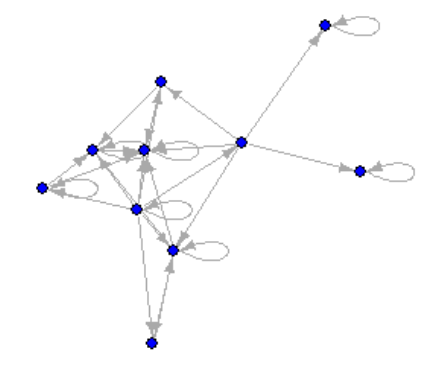

Está red se visualiza con el programa [Cytoscape](https://cytoscape.org/)

[red_transcripcional](./red_transcripcional_tf.gml)

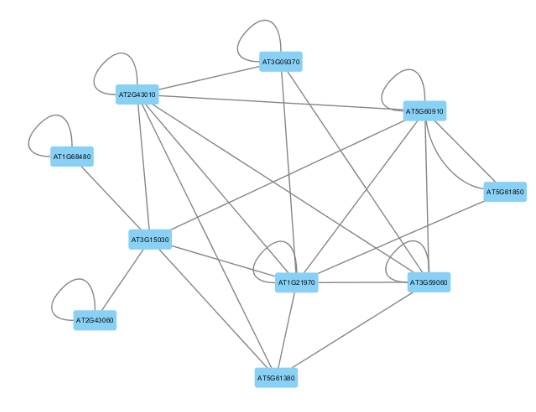

Antes de comenzar con el estudio de los motivos, debemos comprobar que nuestra red **no es libre de escala**, característica que debe cumplir las redes de transcripción génica.

In [ ]:
# Calculo del grado de los nodos
network.degrees <- degree(tfs.network)
hist(network.degrees,col="blue",xlab="Node degree", ylab="Probability",main="Degree distribution")

# Calculo de la frecuencia absoluta del grado de los nodos
degree.frequencies <- table(network.degrees)
# Eliminamos nodos con grado 0 para poder aplicar log10

# Transformación logarítmica
log10.degrees.frequencies <- log10(degree.frequencies)
log10.node.degrees <- log10(as.numeric(names(degree.frequencies)))

# Regresión lineal
lm.r <- lm(log10.degrees.frequencies ~ log10.node.degrees)
summary(lm.r)

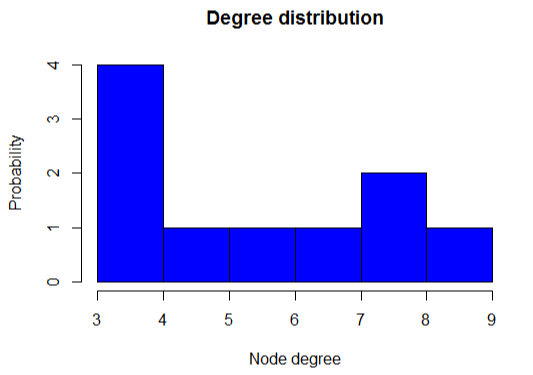

Como se observa en el histograma y atendiendo al **p-valor=0.3434** del análisis, no podemos concluir que la red con la que trabajamos no es libre de escala, ya que el p-valor obtenido ha sido  bajo. No obstante el p-valor tampoco asegura que la red sea libre de escala, por lo que interpretamos un estado intermedio y asumiremos que no es libre de escala para continuar con el análisis.

Por lo tanto, las redes aleatorias que cumplen las mismas propiedas que nuestra red de interés son las generadas según el modelo de Erdos-Renyi (genera redes NO libres de escala). La función erdos.renyi.game genera redes aleatorias que siguen una distribución de Poisson con un número de nodos y aristas dado.

In [ ]:
random.graph <- erdos.renyi.game(n=10, p.or.m=28, type="gnm", directed=TRUE, loops=TRUE)
plot.igraph(x = random.graph,vertex.size=8,edge.arrow.size=0.5,vertex.label="",vertex.color="blue")

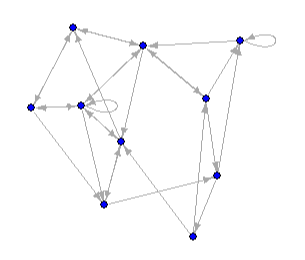

### Motivos de autorregulación: 

Para ello solamente es necesario sumar los elementos de la diagonal principal de la matriz de adyacencia, ya que estos representan una correlación consigo mismos y comprobar su significancia respecto a matrices generadas de forma aleatoria.



In [ ]:
## Número de genes autorregulados en la red de factores de transcripción. 
tfs.adjacency <- as.matrix(get.adjacency(tfs.network))
autorregulation.in.tfs <- sum(diag(tfs.adjacency))
autorregulation.in.tfs

autorregulation.random.graphs <- vector(length=1000, mode="numeric")

## Generación de redes aleatoria
for (i in 1:1000)
{
  random.graph <- erdos.renyi.game(n=21, p.or.m=115, type="gnm", directed=TRUE, loops=TRUE)
  autorregulation.random.graphs[i] <- sum(diag(as.matrix(get.adjacency(random.graph))))
}

mean(autorregulation.random.graphs)
sd(autorregulation.random.graphs)

sum(autorregulation.random.graphs > autorregulation.in.tfs)/10000

Obtuvimos como resultado un p-valor de 0.138, por lo que consideremos significativo y por tanto nuestra red presenta motivos de autorregulación.

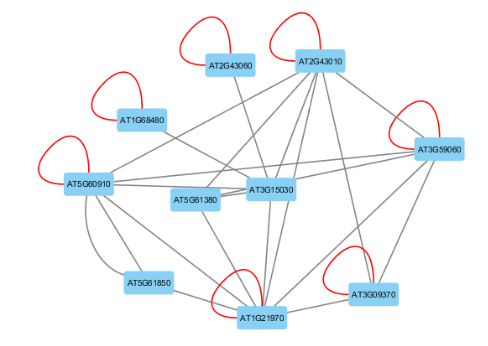

### Motivos de redes de 3 nodos:
La función graph.motifs recibe como entrada una red y un tamaño de subgrafo k (en la actualidad sólo puede recibir tamaños 3 o 4) y devuelve el número de veces que se encuentra cada subgrafo con k nodos en la red. Por lo que contamos el número de motivos que hay en nuestra red y lo comparamos con redes aleatorias para ver si son significativos.

In [ ]:
occurrency.subgraph.three.nodes <- graph.motifs(tfs.network, size=3)
occurrency.subgraph.three.nodes
length(occurrency.subgraph.three.nodes)

No todos los motivos tienen significancia biológica, de las 16 posibles convinaciones que existen entre 3 nodos sólo tiene sentido biológico los siguientes:

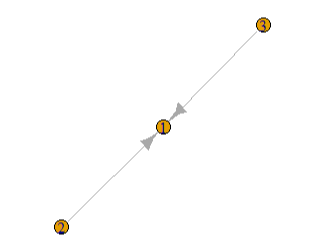

In [ ]:
motifs.3.random.graph <- matrix(0,nrow=1000, ncol=16)

for (i in 1:1000)
{
  random.graph <- erdos.renyi.game(n=21, p.or.m=115, type="gnm", directed=TRUE, loops=TRUE)
  motifs.3.random.graph[i,] <- graph.motifs(random.graph, size=3)
}

mean(motifs.3.random.graph[,3])

sum(motifs.3.random.graph[,3] > occurrency.subgraph.three.nodes[3])/1000

Obtuvimos un **p-valor=1** lo que significa que no existe motivo de red, ya que en las redes generadas por aleatoriedad la frecuencia de esto motivo es mucho mayor.

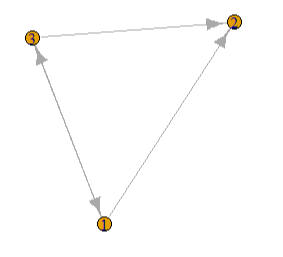

In [ ]:
sum(motifs.3.random.graph[,3] > occurrency.subgraph.three.nodes[14])/1000

Tampoco obtuvimos resultados significativos, con un **p-valor=1**. Por lo que en nuestra red no se observan subgrafos de interés, esto posiblemente se deba a la aleatoriedad de los factores de transcripción escogidos y por tanto a la falta de relación entre ellos.